In [ ]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
path = "/Users/guilhermeviveiros/Desktop/Face_Regonition/mlFacesResized/"

In [39]:
def getExtension(filename):
   fileName, fileExtension = os.path.splitext(filename)
   return fileExtension

def inArray(array, to_look):
    for x in array:
	    if(to_look[1:] == x):
		    return True

def isImage(filename):
   # Extensions to search
   extensions = ['jpeg', 'jpg', 'jpe','png'];
   extension = getExtension(filename)
   if (inArray(extensions, extension)):
       return True
   return False

In [82]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

def set_dataset(path,number_images, width, height):
    
    #o 3 vem do RGB
    train_set = np.empty(shape=(number_images,width,height,3));
    test_set = np.empty(shape=(2*5,width,height,3));
    
    tmp_train_set = 0;
    tmp_test_set = 0;
    
    mlfaces = os.listdir(os.path.expanduser(
        path
    ))
    
    for user in mlfaces:
        
        if not user == ".DS_Store":
        
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            for image in user_images:
                
                tmp = 1
                
                if(isImage(image)):
        
                    image_path = path + user + "/" + image
                
                
                    im = mpimg.imread(image_path)
                    
                    if(tmp < 9):
                        train_set[tmp_train_set] = im;
                    else : test_set[tmp_test_set] = im;
            
            tmp = tmp+1;     
            tmp_train_set = tmp_train_set+1;
            tmp_test_set = tmp_test_set+1;
        
                    
                
    return train_set,test_set;


In [83]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

train_set,test_set = set_dataset(path,45,2048,1536);

In [84]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))

Train set with a shape of -> (45, 2048, 1536, 3)
Test set with a shape of -> (10, 2048, 1536, 3)


In [90]:
#1) calcular a matriz de covariancia

#temos que ter 45 amostras, cada amostra com a sua respeitva coluna, logo vou passar de (2048,1536,3) para (2048*1536*3)
train_set = train_set.reshape(train_set.shape[0], (train_set.shape[1]*train_set.shape[2]*train_set.shape[3]))
test_set = test_set.reshape(test_set.shape[0], (test_set.shape[1]*test_set.shape[2]*test_set.shape[3]))

In [91]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#cada amostra/linha tem todas as suas features representadas por coluna (pixeis)

Train set with a shape of -> (45, 9437184)
Test set with a shape of -> (10, 9437184)


In [96]:
mat_cov = np.cov(train_set)
#print(train_set[0,:].shape)

In [134]:
mat_cov.shape
print(train_set.shape)
#temos os 45 vetores proprios

(45, 9437184)


In [ ]:
vet_prop, val_prop, _ = np.linalg.svd(train_set,full_matrices=False)

In [ ]:
print(vet_prop.shape)
print(val_prop.shape)
print(val_prop)

In [ ]:
if(not sum(val_prop) / np.trace(mat_cov) >= 0.001): print("Algo deu errado nos valores próprios!");
else : print("Até agora, tudo bem")

In [116]:
#2) ver quantos valores próprios é que são relevantes
diag = np.trace(mat_cov)
confianca_alvo = 0.90
k = 0
confianca = 0
while confianca < confianca_alvo:
    confianca= confianca + (val_prop[k]/diag)
    k += 1
k, confianca

(3, 0.9044780753118149)

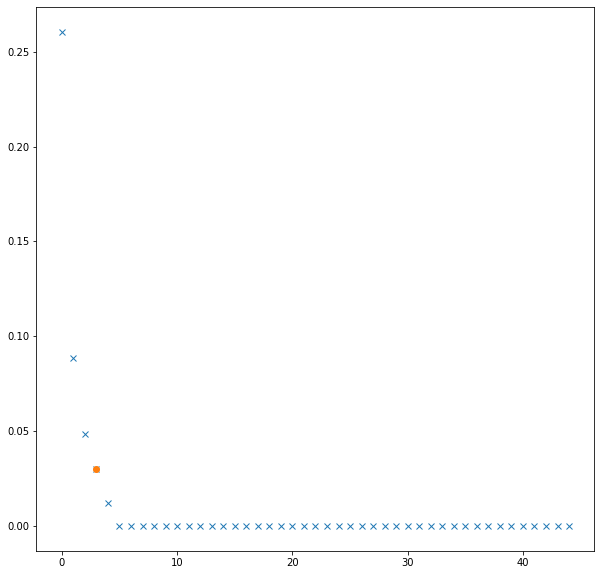

In [117]:
plt.figure(figsize=(10,10))
M = 45 #representa o número de valores próprios
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [120]:
#podemos reparar pelo método do cotovelo que com 3 vetores próprios temos uma boa representação do conjunto de imagens
#observemos em baixo os primeiros vetores próprios(aqueles que representam melhor o dataset)

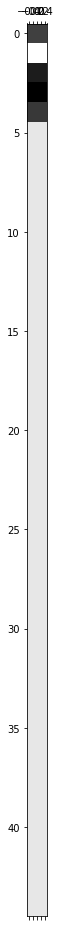

In [133]:
display(plt.matshow(np.reshape(vet_prop.T[0], (45,1)), cmap='gray'))